# G/M/1 Wartesystem
Zur Zustandsanalyse wird der geoemtrische Ansatz benutzt. Die Zustandswahrscheinlichkeit ist 
$$x(j)=(1-\sigma)\sigma^j, j>=0, \rho<1$$

Der Parameter $\sigma$ lässt sich numerisch durch Lösen der folgenden Gleichung bestimmen. Dabei ist die Zufallsvariable $\Gamma$ die Anzahl der Anforderungen, die während eines Zwischenankunftsintervalls A bedient werden können. Während $A$ einer allgemeinen Verteilung folgt, wird die Bedienzeit durch eine exponentielle Verteilung mit Rate $\mu$ beschrieben, d.h. $B \sim Exp(\mu)$.
$$ z = \Gamma_{EF}(z)$$

Wir betrachtent im folgenden für die Zwischenankunftszeiten eine Gleichverteilung im Intervall $[0,2/\lambda]$ mit Erwartungswert $E[A]=1/\lambda$. Es ist $A \sim U(0,2/\lambda)$. Die Laplace-Transformierte

Die erzeugenden Funktion erhält man mit Hilfe der [Laplace-Transformierten der Gleichverteilung](https://en.wikipedia.org/wiki/Laplace%E2%80%93Stieltjes_transform).
$$ \Gamma_{EF}(z) = \phi_A(\mu(1-s))$$

Nun berechnen wir $ z = \Gamma_{EF}(z)$. Dazu berechnen wir die Lösung von $\Gamma_{EF}(z)-z=0$. Dazu gibt es numerische Verfahren wie [fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

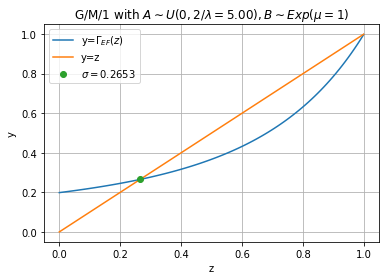

In [2]:
import numpy as np
import matplotlib.pyplot as plt

lam = 0.4
mu = 1

def gamEF(z, lam=0.5, mu=1):
    return (1-np.exp(-2/lam*mu*(1-z)))/(2/lam*mu*(1-z))

z = np.linspace(0,0.999,100)
plt.plot(z, gamEF(z, lam=lam), label='y=$\Gamma_{EF}(z)$')
plt.plot(z, z, label='y=z')
plt.grid()
plt.xlabel('z')
plt.ylabel('y')
plt.legend()
plt.title(f'G/M/1 with $A \sim U(0,2/\lambda={2/lam:.2f}), B \sim Exp(\mu={mu})$');


from scipy.optimize import fsolve

def intersection(lam=0.5, mu=1):
    return fsolve(lambda z: gamEF(z, lam=lam)-z, 0.3)

sigma = intersection(lam=lam)

plt.plot(sigma, gamEF(sigma, lam=lam), 'o', label=f'$\sigma={sigma[0]:.4f}$')
plt.legend();

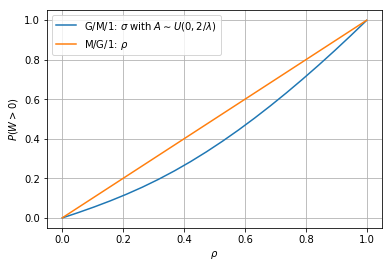

In [3]:
#%% Waiting probability: sigma=P(W>0)
plt.figure(2)
plt.clf()
lams = np.linspace(0.001,0.999,20)
sigmas = [intersection(lam=x) for x in lams]
plt.plot(lams/mu, sigmas, label='G/M/1: $\sigma$ with $A \sim U(0,2/\lambda)$')
plt.plot(lams/mu, lams/mu, label='M/G/1: $\\rho$')
plt.grid()
plt.xlabel('$\\rho$')
plt.ylabel('$P(W>0)$')
plt.legend();